In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

X = np.load('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/X.npy')
Y = np.load('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/Y.npy')

In [3]:
X_train = X[:4000]          # first 4000 rows ( 0 - 3999 )
X_test = X[4000:]

Y_train = Y[:4000]
Y_test = Y[4000:]

print("X_train shape :", X_train.shape)
print("Y_train shape :", Y_train.shape)
print("\nX_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)


X_train shape : (4000, 5, 4)
Y_train shape : (4000, 1)

X_test shape : (422, 5, 4)
Y_test shape : (422, 1)


In [ ]:
from matplotlib import pyplot as plt

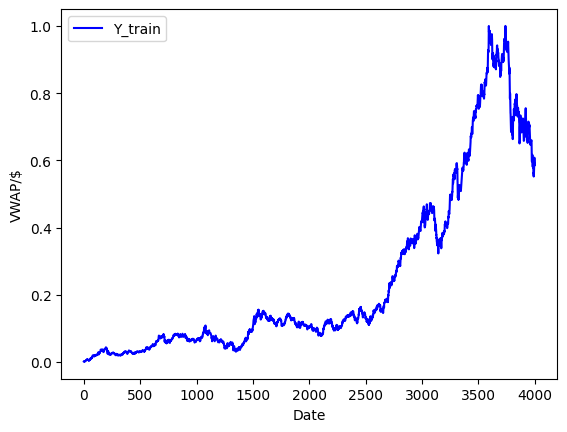

In [ ]:
plt.plot(Y_train, 'b', label='Y_train')
plt.legend()
plt.xlabel("Date")
plt.ylabel("VWAP/$")
plt.show()

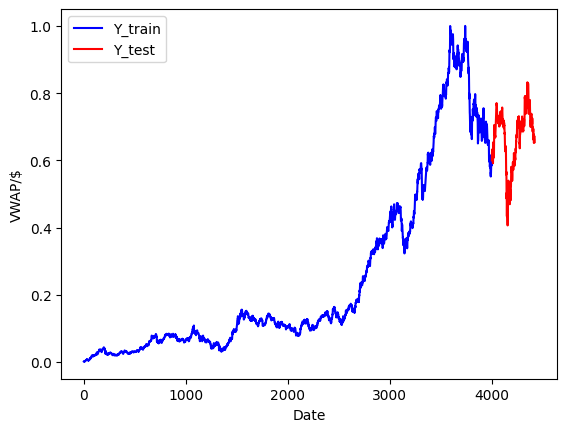

In [ ]:
X_test_range = np.arange(4000, 4422)

plt.plot(Y_train, 'b', label='Y_train')
plt.plot(X_test_range, Y_test, 'r', label='Y_test')
plt.legend()
plt.xlabel("Date")
plt.ylabel("VWAP/$")
plt.show()

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from kerastuner import HyperModel, RandomSearch
from keras.callbacks import EarlyStopping

<ipython-input-8-e1ae091adff8>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [ ]:
model = Sequential()

model.add(LSTM(units=192, return_sequences=False, activation='tanh', input_shape=(5,4)))
model.add(Dropout(0.1))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.0006233510651221175), metrics=['mae'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 192)               151296    
                                                                 
 dropout_5 (Dropout)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 193       
                                                                 
Total params: 151489 (591.75 KB)
Trainable params: 151489 (591.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=8,
    epochs=100,
    validation_split=0.2,
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/100
400/400 [==============================] - 5s 7ms/step - loss: 4.9693e-04 - mae: 0.0101 - val_loss: 5.5905e-04 - val_mae: 0.0184
Epoch 2/100
400/400 [==============================] - 2s 4ms/step - loss: 7.9023e-05 - mae: 0.0060 - val_loss: 3.9510e-04 - val_mae: 0.0155
Epoch 3/100
400/400 [==============================] - 2s 4ms/step - loss: 6.7367e-05 - mae: 0.0057 - val_loss: 2.9577e-04 - val_mae: 0.0128
Epoch 4/100
400/400 [==============================] - 2s 4ms/step - loss: 6.6583e-05 - mae: 0.0055 - val_loss: 9.2266e-04 - val_mae: 0.0262
Epoch 5/100
400/400 [==============================] - 2s 4ms/step - loss: 7.3605e-05 - mae: 0.0059 - val_loss: 3.2697e-04 - val_mae: 0.0141
Epoch 6/100
400/400 [==============================] - 2s 4ms/step - loss: 5.8941e-05 - mae: 0.0052 - val_loss: 0.0010 - val_mae: 0.0278
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 4.9036e-05 - mae: 0.0048 - val_loss: 2.3891e-04 - val_mae: 0.0114
Epoch 8/100
400/4

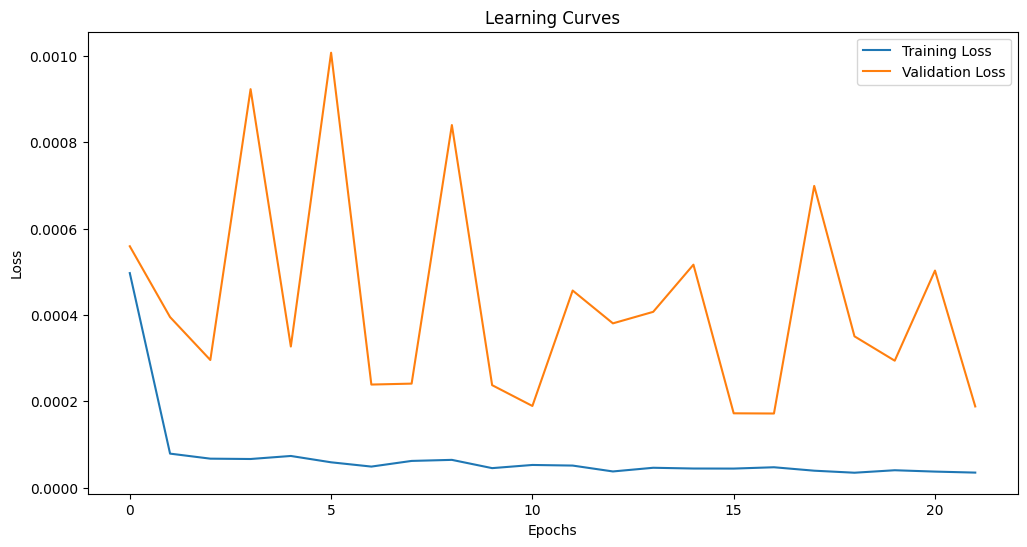

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.show()

In [ ]:
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

14/14 [==============================] - 1s 3ms/step - loss: 2.7951e-04 - mae: 0.0123
Test Loss: 0.0002795147302094847, Test MAE: 0.012257251888513565


In [ ]:
Y_train_predict = model.predict(X_train)
Y_test_predict = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error

rmse_train = math.sqrt(mean_squared_error(Y_train, Y_train_predict))
print("Train RMSE :",{rmse_train})

rmse_test = math.sqrt(mean_squared_error(Y_test, Y_test_predict))
print("Test RMSE :",{rmse_test})

Train RMSE : {0.006898292163969229}
Test RMSE : {0.016718694426548508}


In [ ]:
from sklearn.metrics import r2_score

r2=r2_score(Y_test,Y_test_predict)
print('r2 score:',r2)

r2 score: 0.9624694023967516


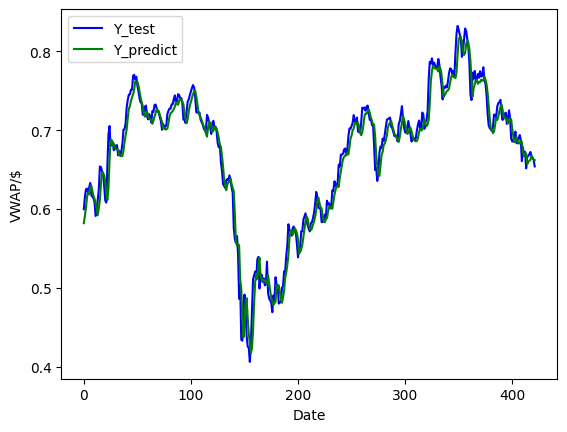

In [ ]:
plt.plot(Y_test,'b',label='Y_test')
plt.plot(Y_test_predict,'g',label='Y_predict')

plt.xlabel('Date')
plt.ylabel('VWAP/$')
plt.legend()
plt.show()

In [ ]:
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First LSTM LAyer
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                       return_sequences=False,
                       activation=hp.Choice('activation', values=['relu', 'tanh']),
                       input_shape=(5, 4)))
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))


        # Output Layer
        model.add(Dense(units=1, activation='linear'))

        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='mse',
            metrics=['mae']
        )
        return model


# create RandomSearch tuner
tuner = RandomSearch(
    LSTMHyperModel(),
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
)

# Perform hyperparameter search
tuner.search(X_train, Y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=10)])


best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"Best Hyperparameters: {best_hyperparameters.values}")


Reloading Tuner from ./untitled_project/tuner0.json
Best Hyperparameters: {'units': 192, 'activation': 'tanh', 'dropout': 0.1, 'learning_rate': 0.002375467914307329}


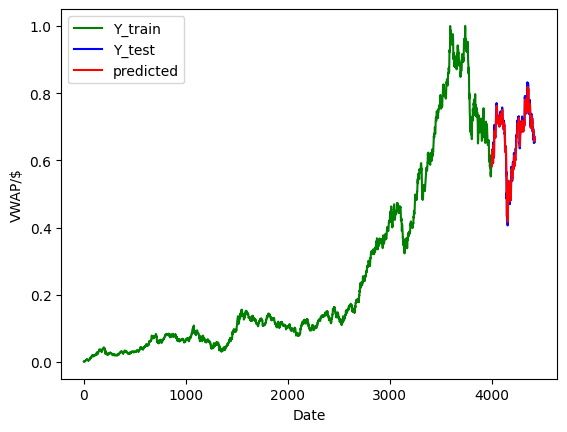

In [ ]:
test_x_range=np.arange(4000, 4422)
#test_x_range is an array of values between 4000-4365

plt.plot(Y_train,'g',label='Y_train')
plt.plot(test_x_range,Y_test,'b',label='Y_test')
plt.plot(test_x_range,Y_test_predict,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('VWAP/$')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/LSTM_model')

In [6]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/Stock Price Prediction System/LSTM_model")

In [7]:
last_5_days = X_test[-1]
print("Last 5 days :", last_5_days)

Last 5 days : [[0.65251989 0.6660765  0.669279   0.0195356 ]
 [0.6658029  0.67363676 0.67345873 0.02602474]
 [0.66373699 0.6654965  0.66739812 0.04518463]
 [0.65341257 0.65949307 0.6677116  0.03936868]
 [0.66017139 0.65923359 0.66844305 0.02089493]]


In [9]:
input_data = np.array(last_5_days).reshape(1,5,4)

In [11]:
next_day_prediction = model.predict(input_data)
print("Next day Stock Price :", next_day_prediction[0,0])

1/1 [==============================] - 0s 18ms/step
Next day Stock Price : 0.6619829


In [12]:
future_prediction = []

In [13]:
for i in range(30):
  input_data = np.array(last_5_days).reshape(1,5,4)
  next_day_prediction = model.predict(input_data)
  future_prediction.append(next_day_prediction[0,0])
  next_day_data = np.append(last_5_days[1:], [[next_day_prediction[0,0]]*4], axis=0)
  last_5_days= next_day_data

print(future_prediction)

1/1 [==============================] - 0s 24ms/step
[0.6619829, 0.6536949, 0.6526624, 0.6499101, 0.6458074, 0.64034337, 0.63592243, 0.6315023, 0.62719584, 0.6230478, 0.6190598, 0.6152003, 0.6114727, 0.6078712, 0.60438913, 0.6010213, 0.59776306, 0.5946097, 0.59155667, 0.5885999, 0.5857355, 0.5829597, 0.5802689, 0.57765985, 0.5751293, 0.5726742, 0.57029176, 0.5679792, 0.56573397, 0.5635535]


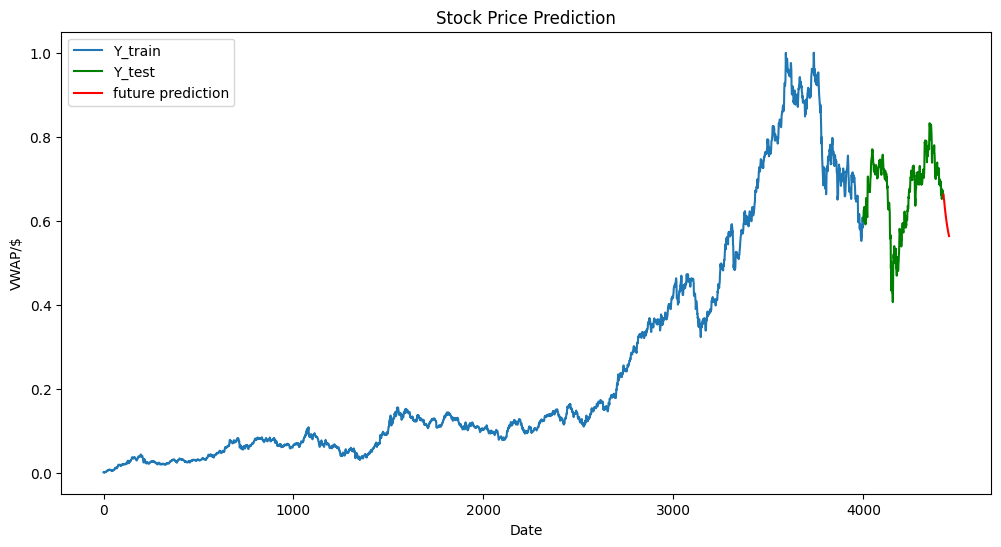

In [28]:
from matplotlib import pyplot as plt

future_prediction = np.array(future_prediction)
combined_Y = np.concatenate([Y_test, future_prediction.reshape(-1,1)])

test_x_range=np.arange(4000, 4422)
future_range = np.arange(4422,4422 + len(future_prediction))

plt.figure(figsize=(12, 6))
plt.plot(Y_train,  label='Y_train')
plt.plot(test_x_range, Y_test, 'g', label='Y_test')
plt.plot(future_range, future_prediction, 'r', label='future prediction')
plt.legend()
plt.xlabel("Date")
plt.ylabel("VWAP/$")
plt.title("Stock Price Prediction")
plt.show()